In [1]:
# Import Essential Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
studydata = pd.read_csv('studydata.csv')
studydata.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
studydata['total_score'] = studydata['math_score'] + studydata['reading_score'] + studydata['writing_score']
studydata['mean_score'] = round(studydata['total_score'] / 3, 2)
studydata['median_score'] = studydata[['math_score', 'reading_score', 'writing_score']].median(axis=1)

studydata.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,mean_score,median_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67,72.0
1,female,group C,some college,standard,completed,69,90,88,247,82.33,88.0
2,female,group B,master's degree,standard,none,90,95,93,278,92.67,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33,47.0
4,male,group C,some college,standard,none,76,78,75,229,76.33,76.0


## Multi-Class Classification Tree

Response Variable : **race_ethnicity**     
Predictor Feature : **reading_score, writing_score, math_score, total_score**  

In [4]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["reading_score", "writing_score", "math_score", "total_score"]

y = pd.DataFrame(studydata['race_ethnicity'].astype('category'))
X = pd.DataFrame(studydata[predictors]) 

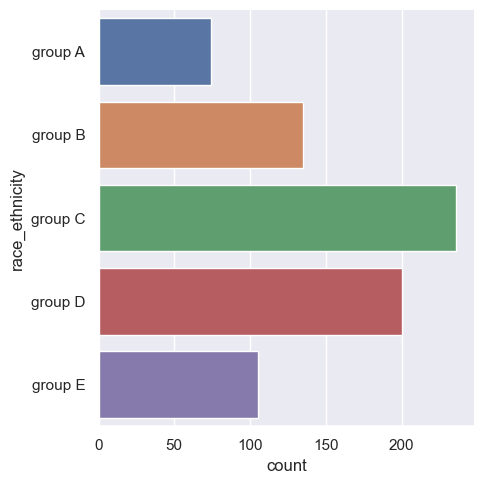

In [5]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Draw the distribution of Response
sb.catplot(y = "race_ethnicity", data = y_train, kind = "count")

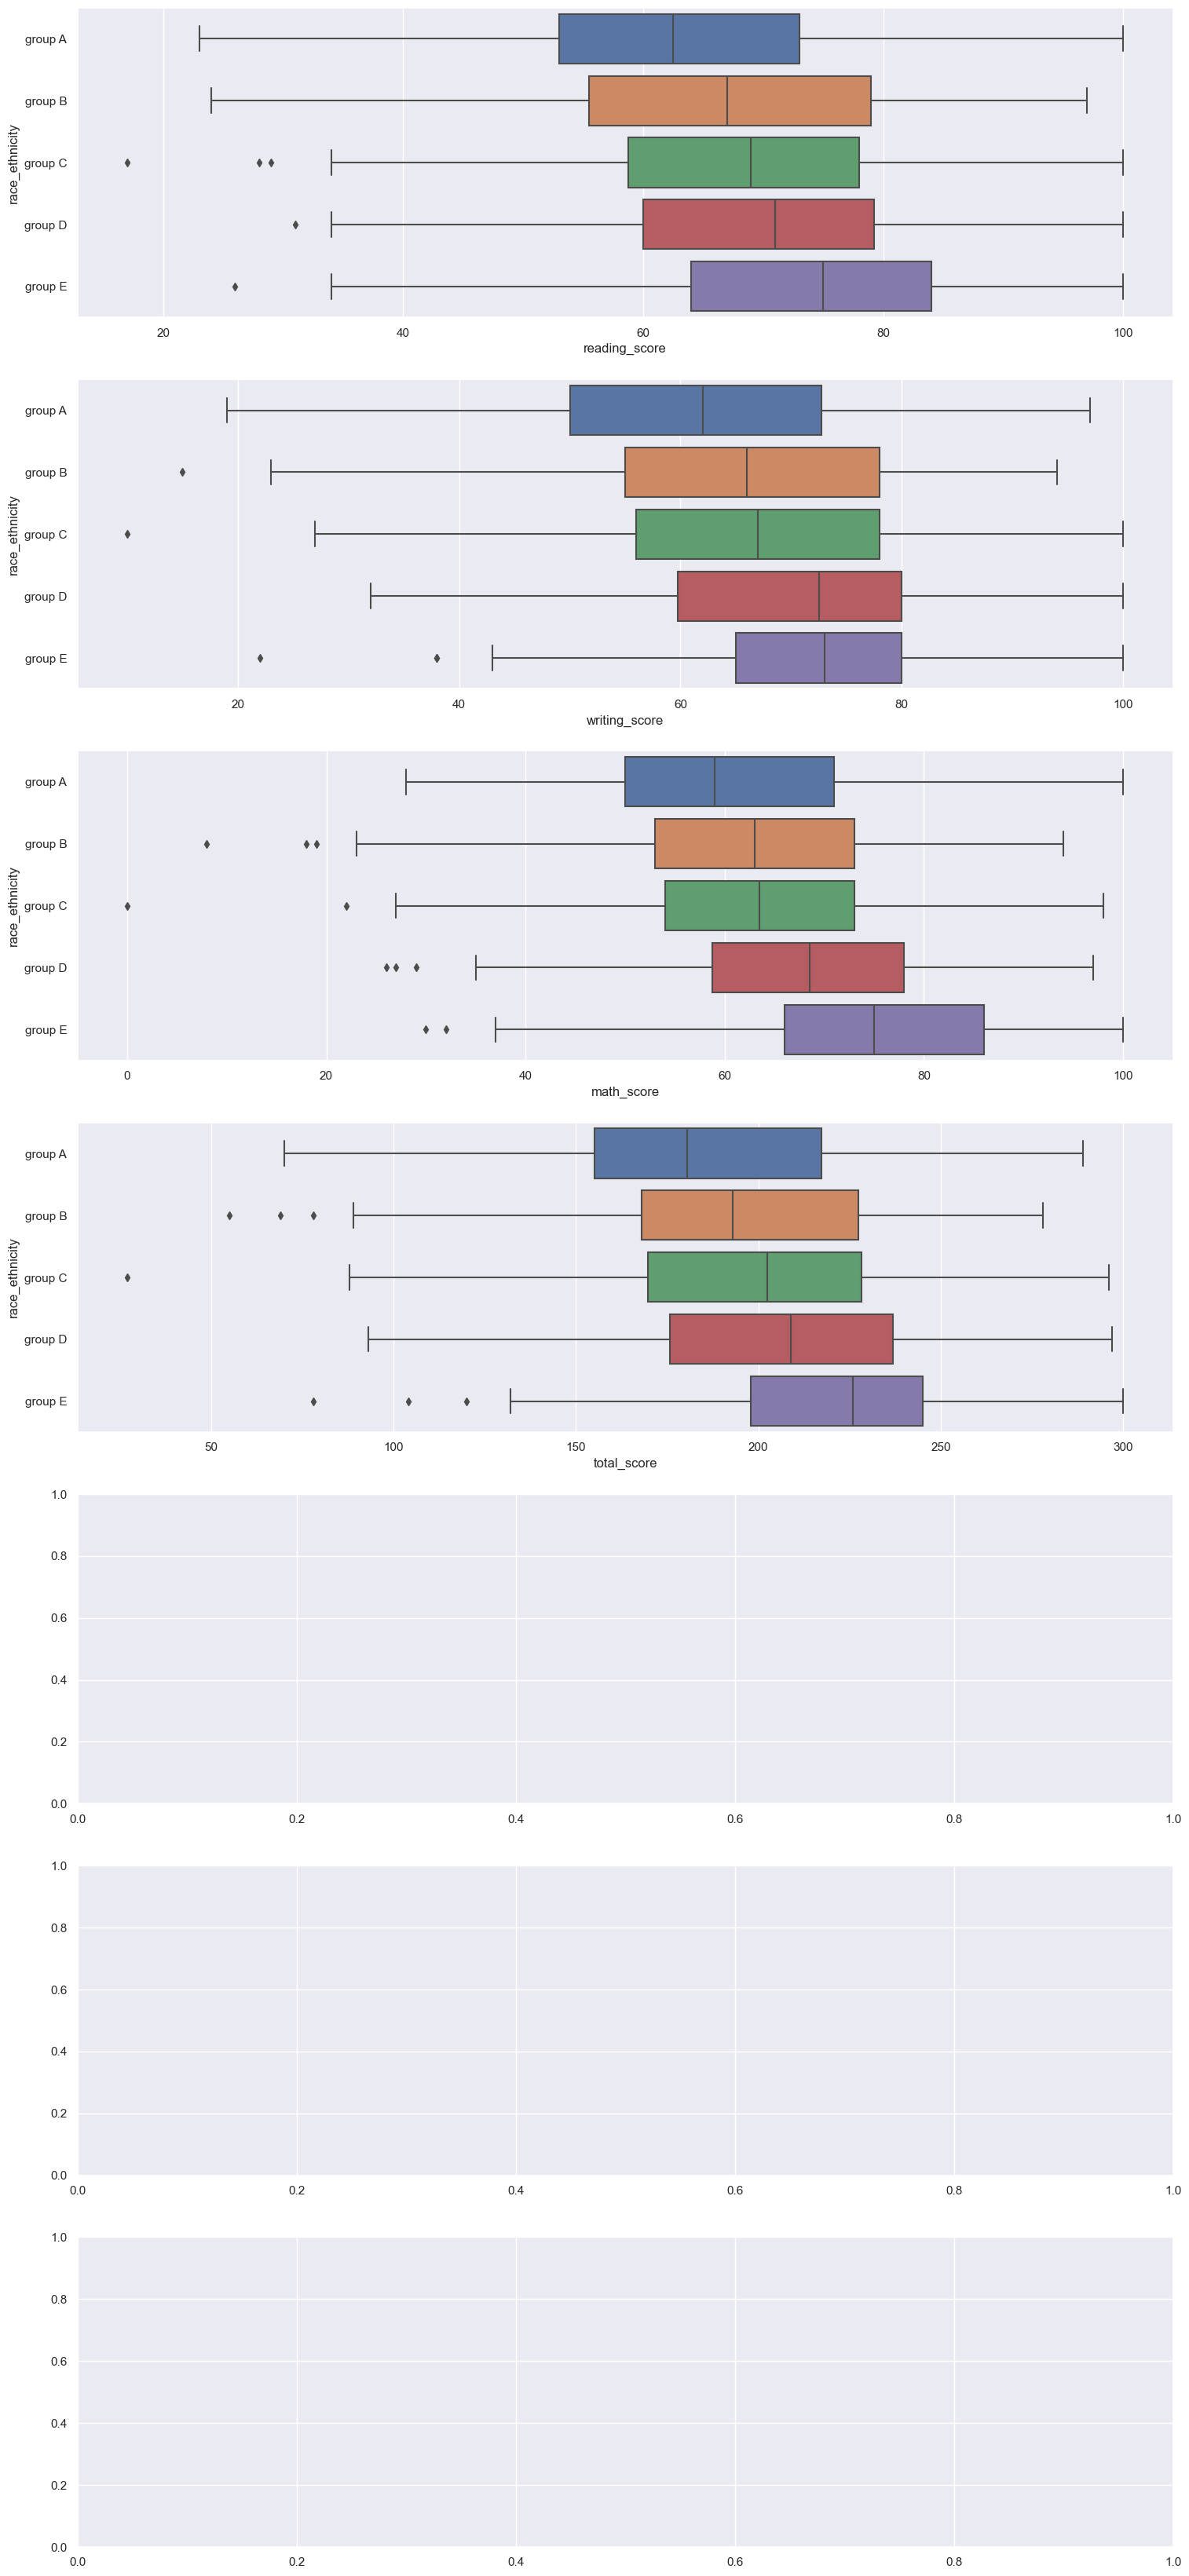

In [6]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f, axes = plt.subplots(7, 1, figsize=(18, 42))

count = 0
for var in X_train:
    sb.boxplot(x = var, y = "race_ethnicity", data = trainDF, orient = "h", ax = axes[count])
    count += 1

In [7]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.384

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.308



<Axes: >

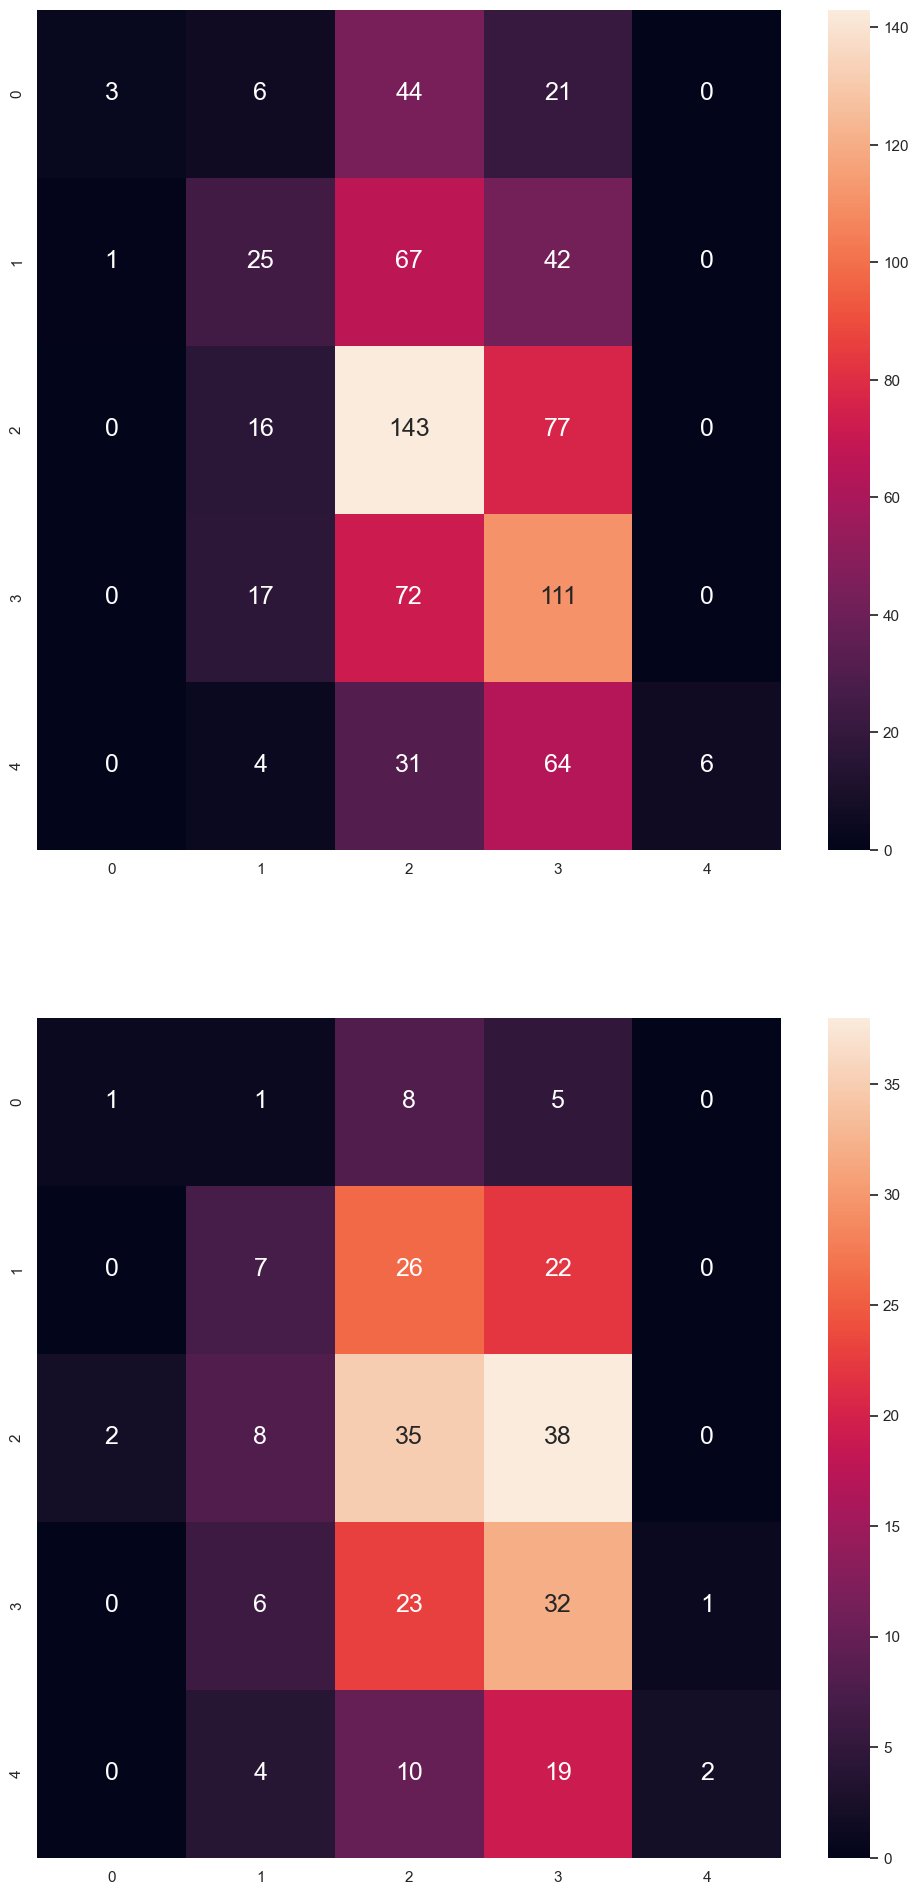

In [8]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

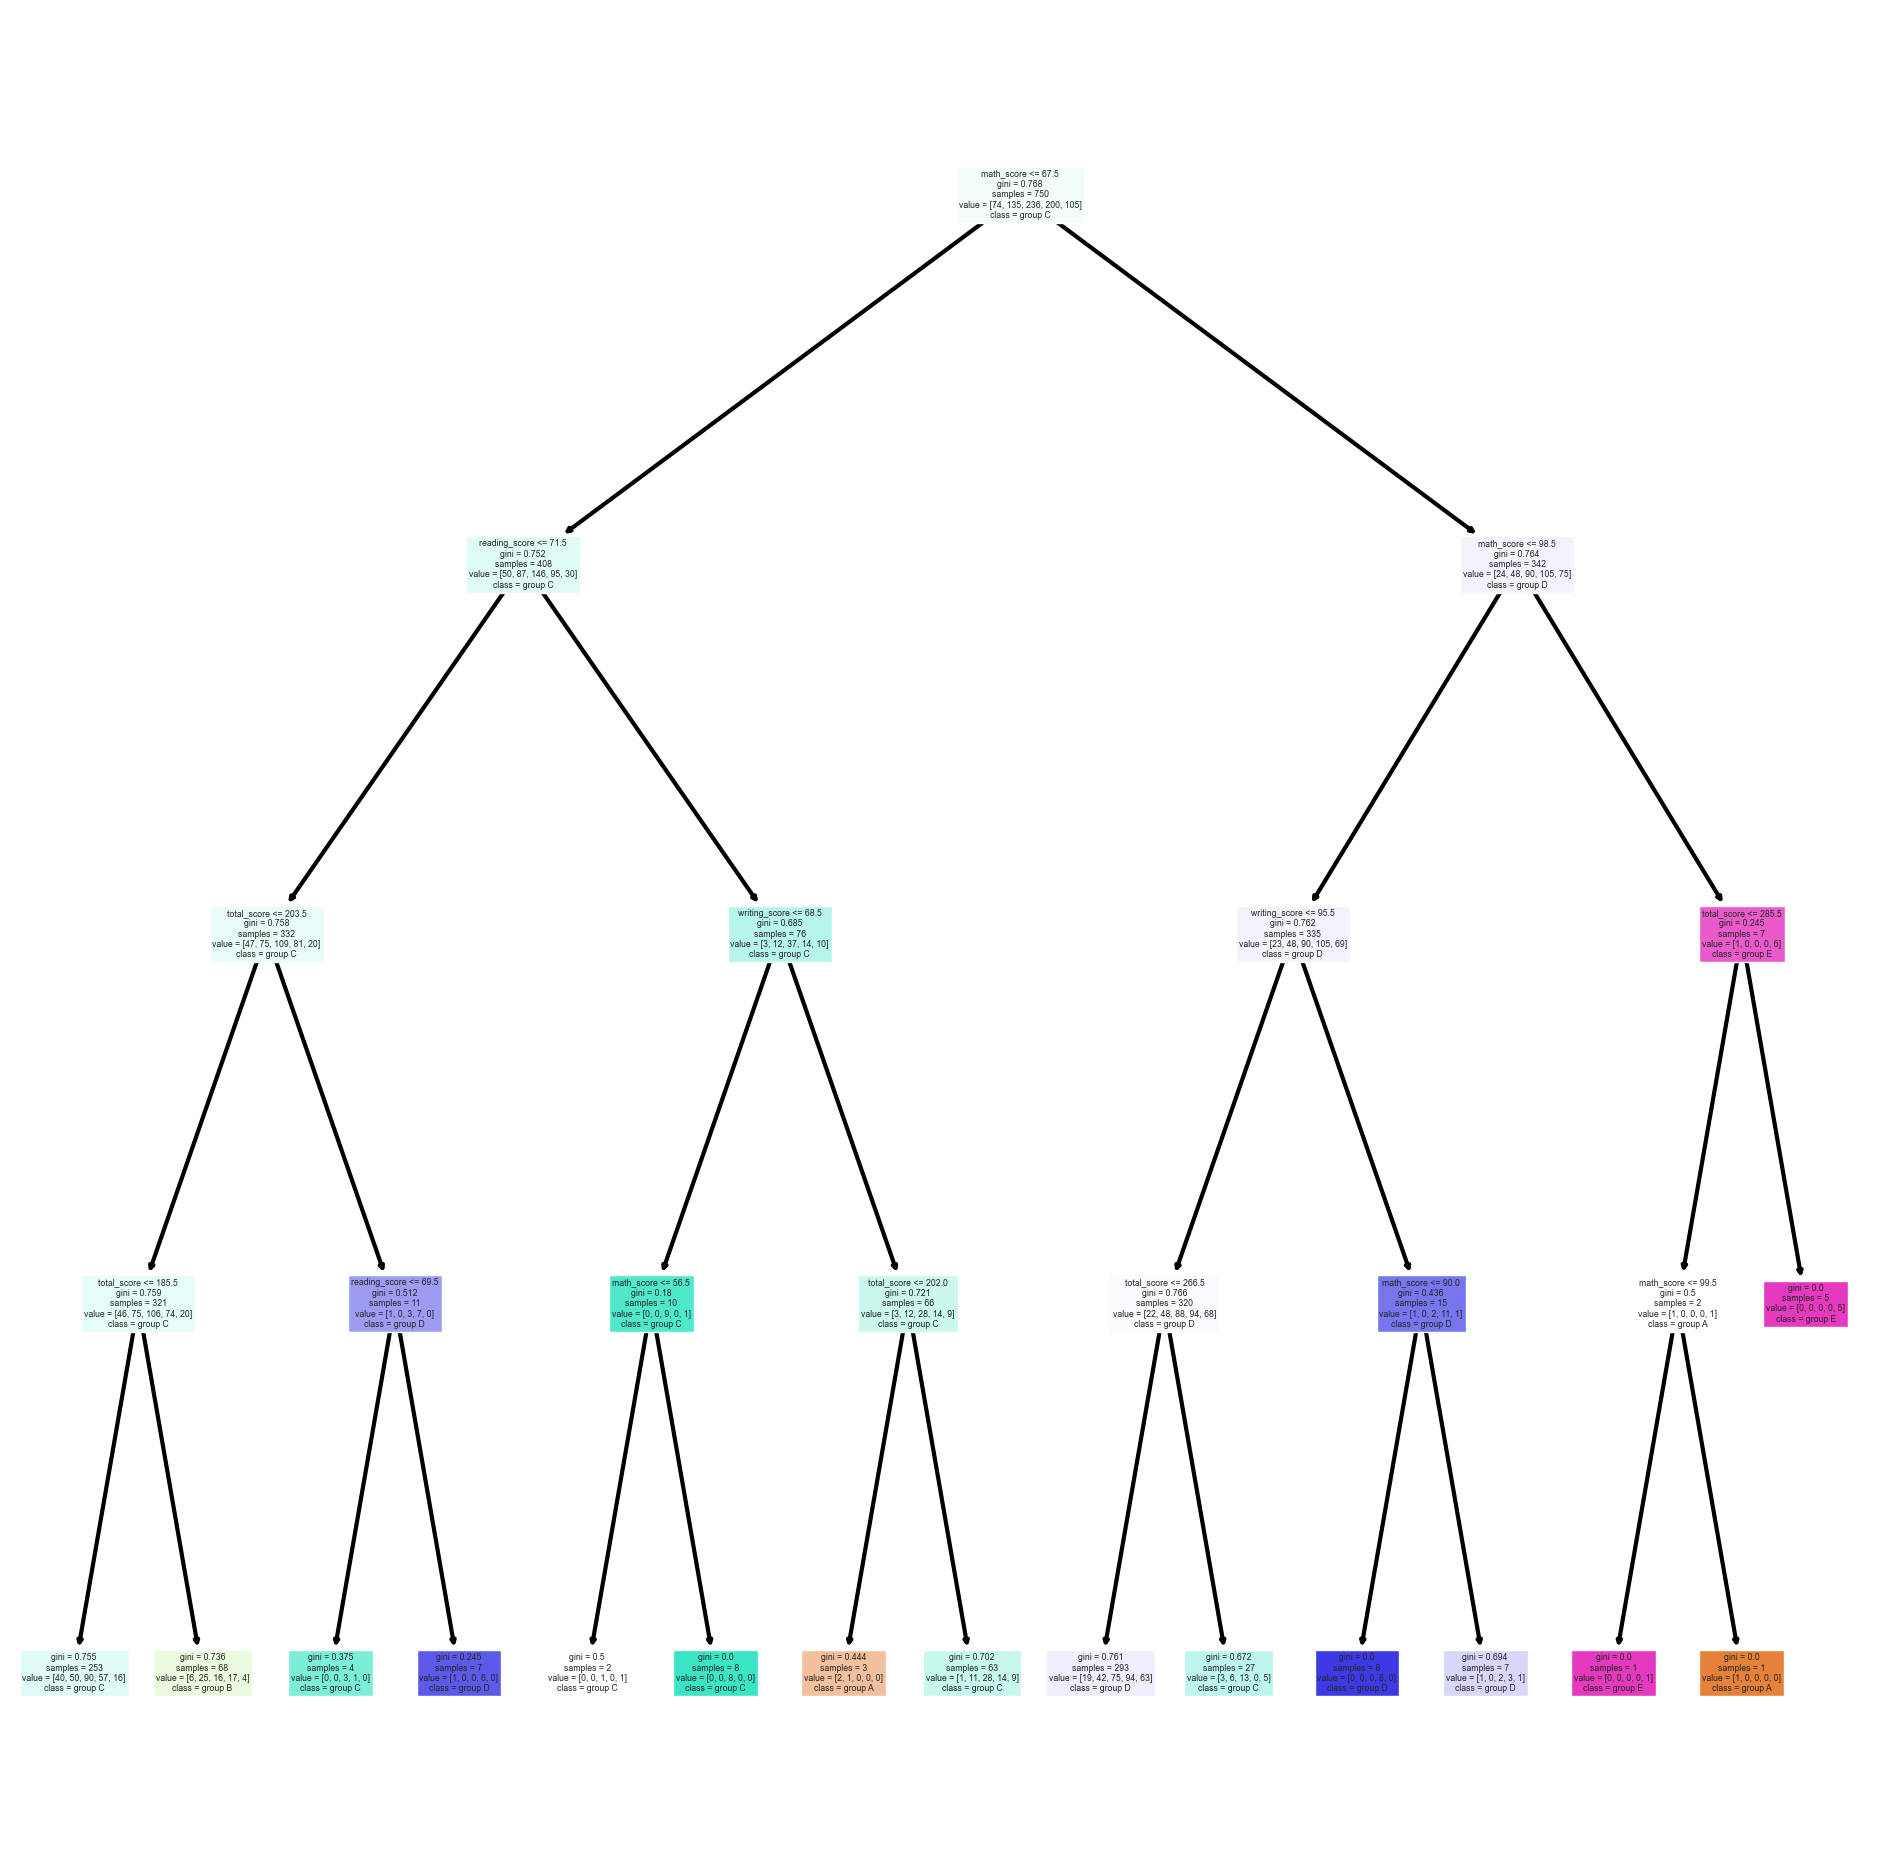

In [9]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(24, 24))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.3

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.168



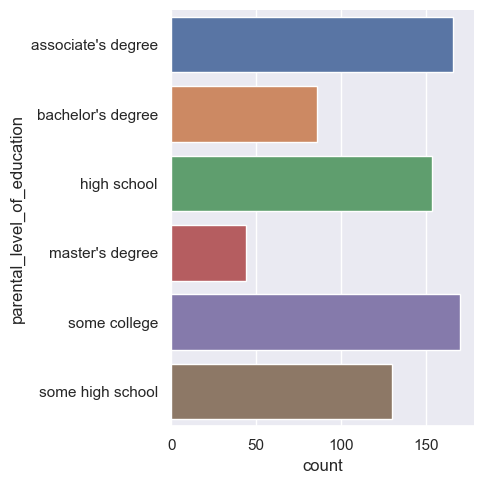

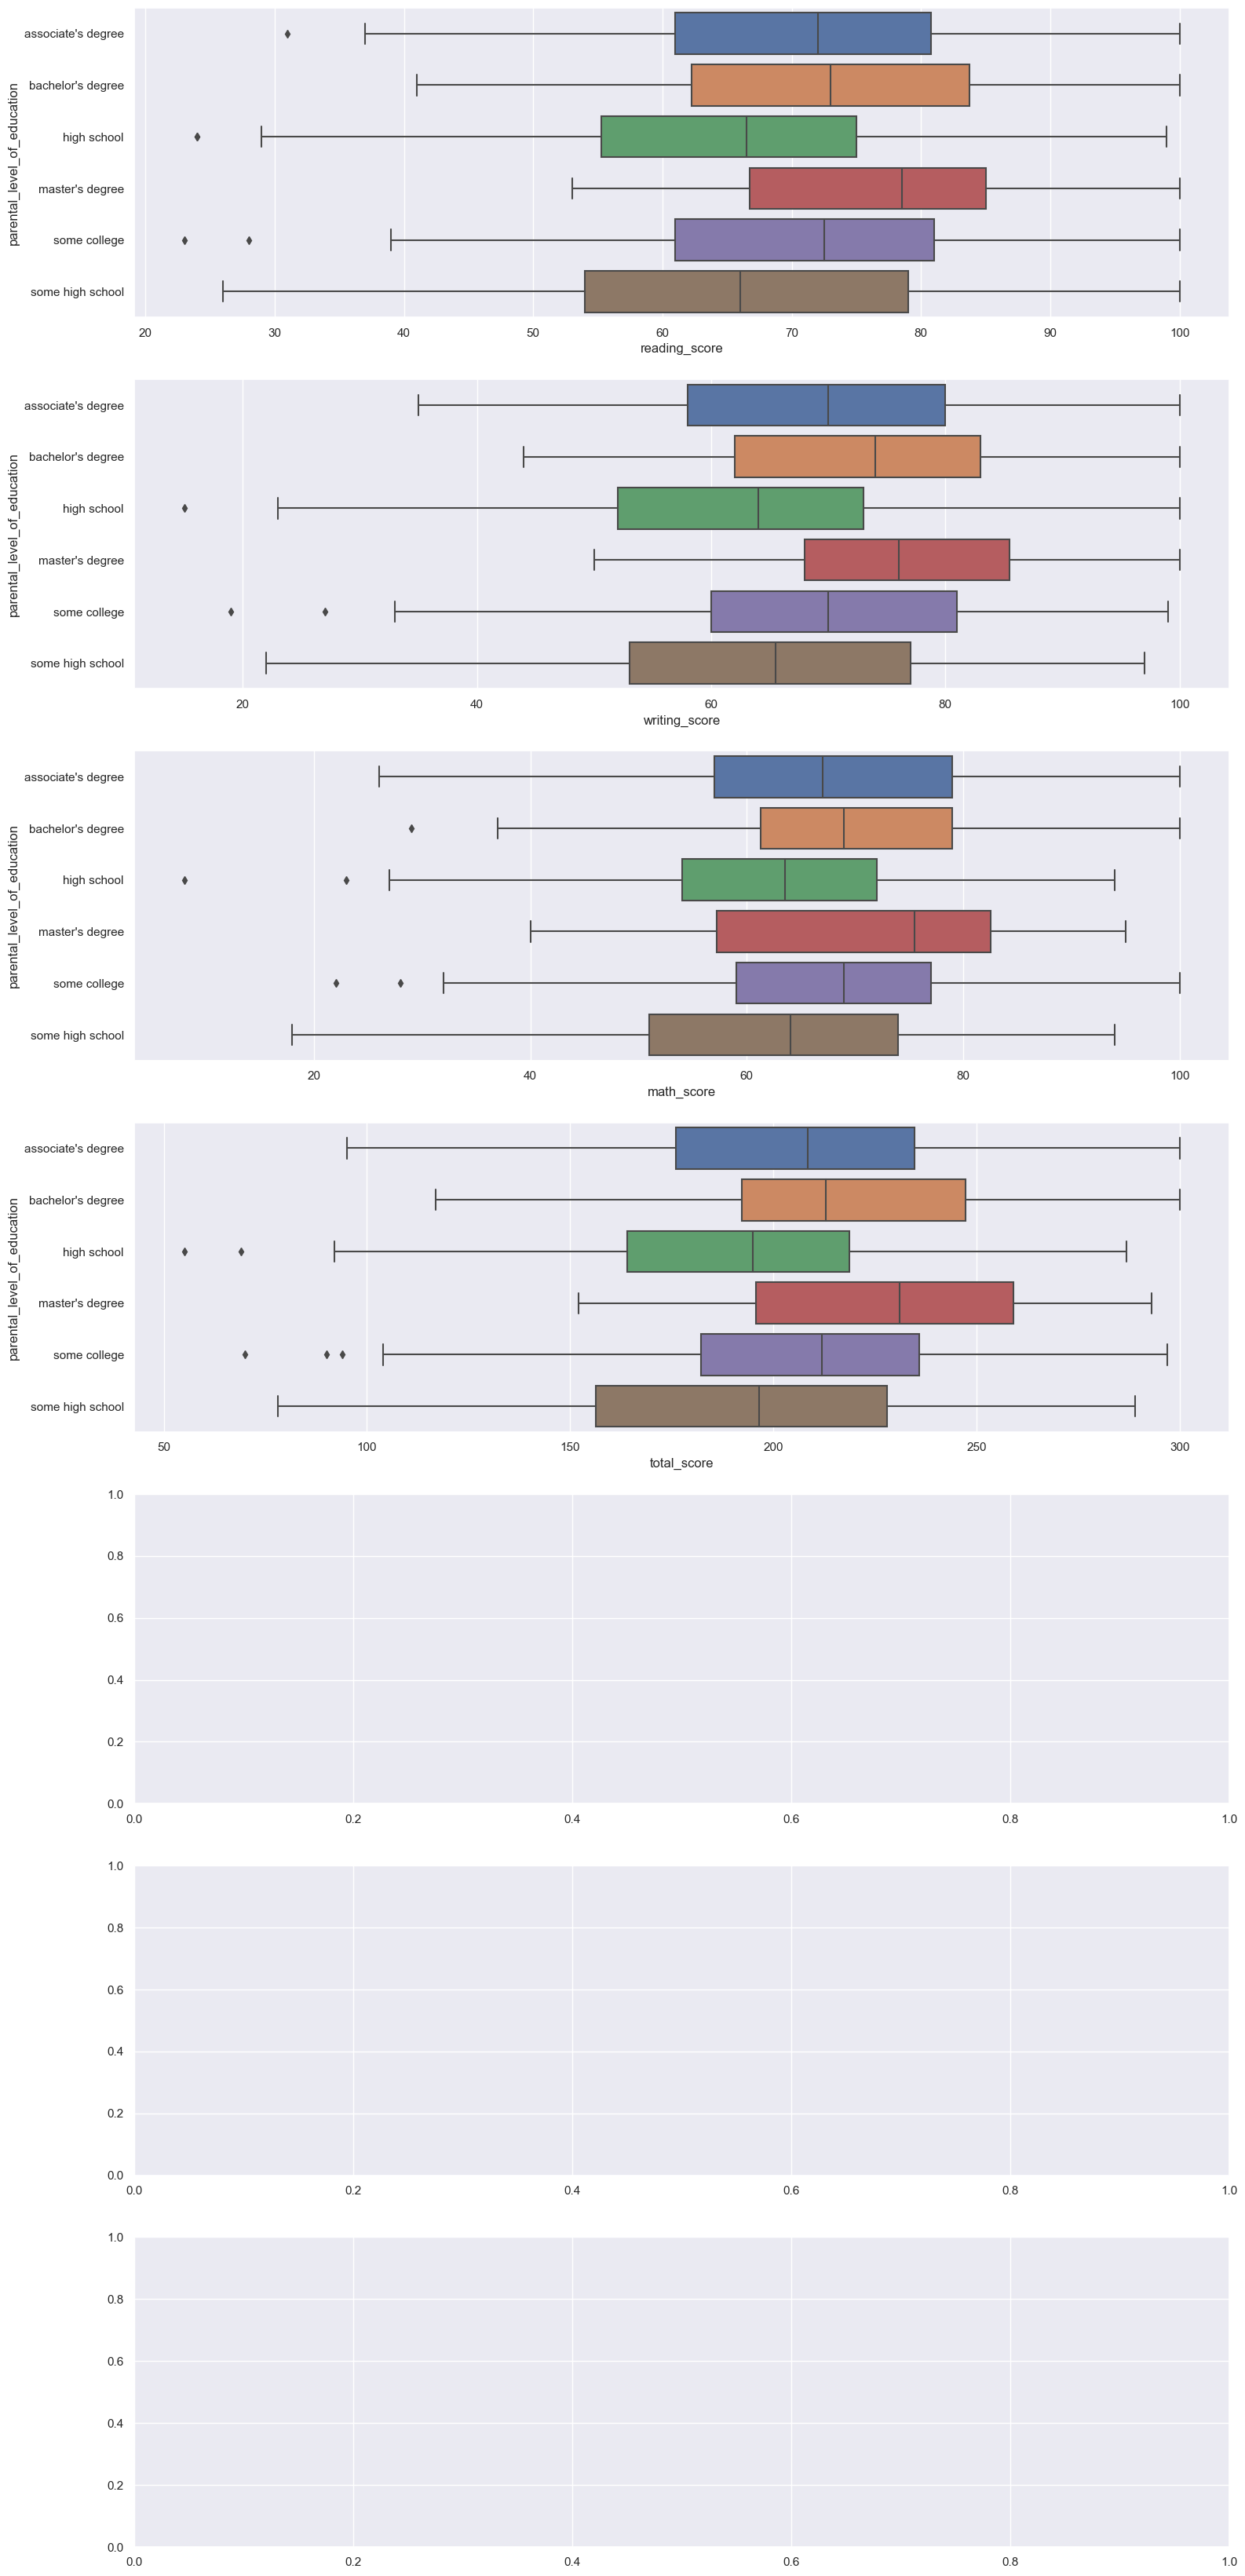

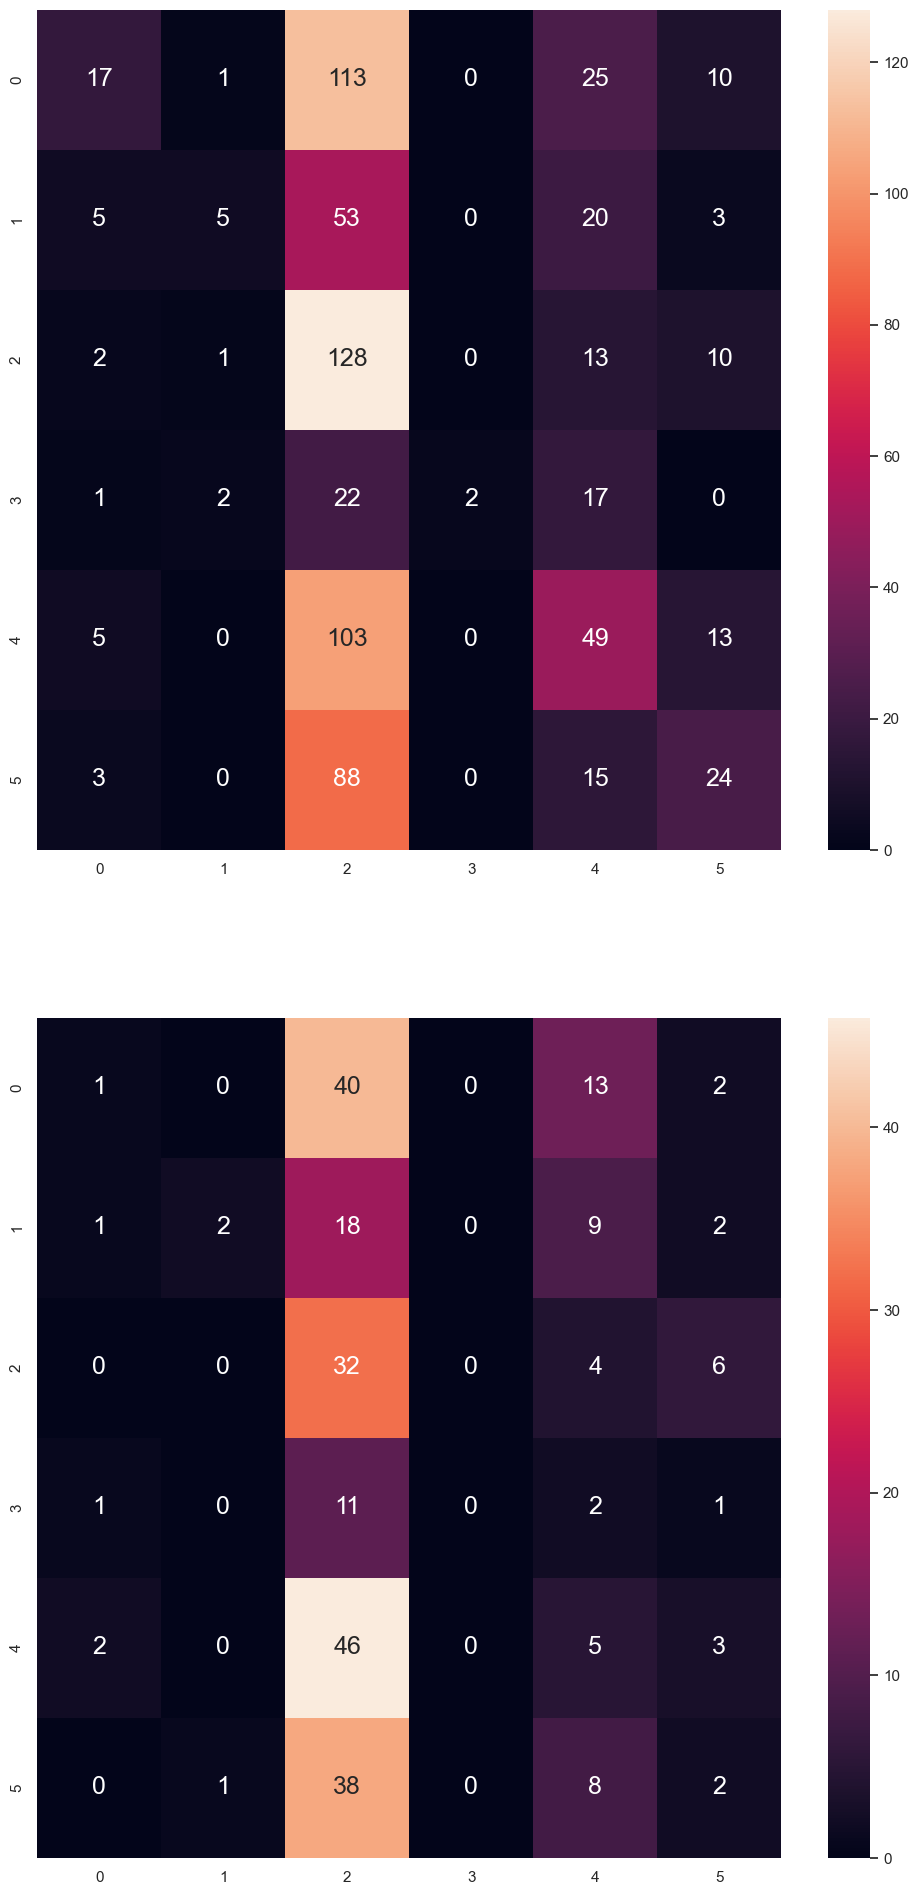

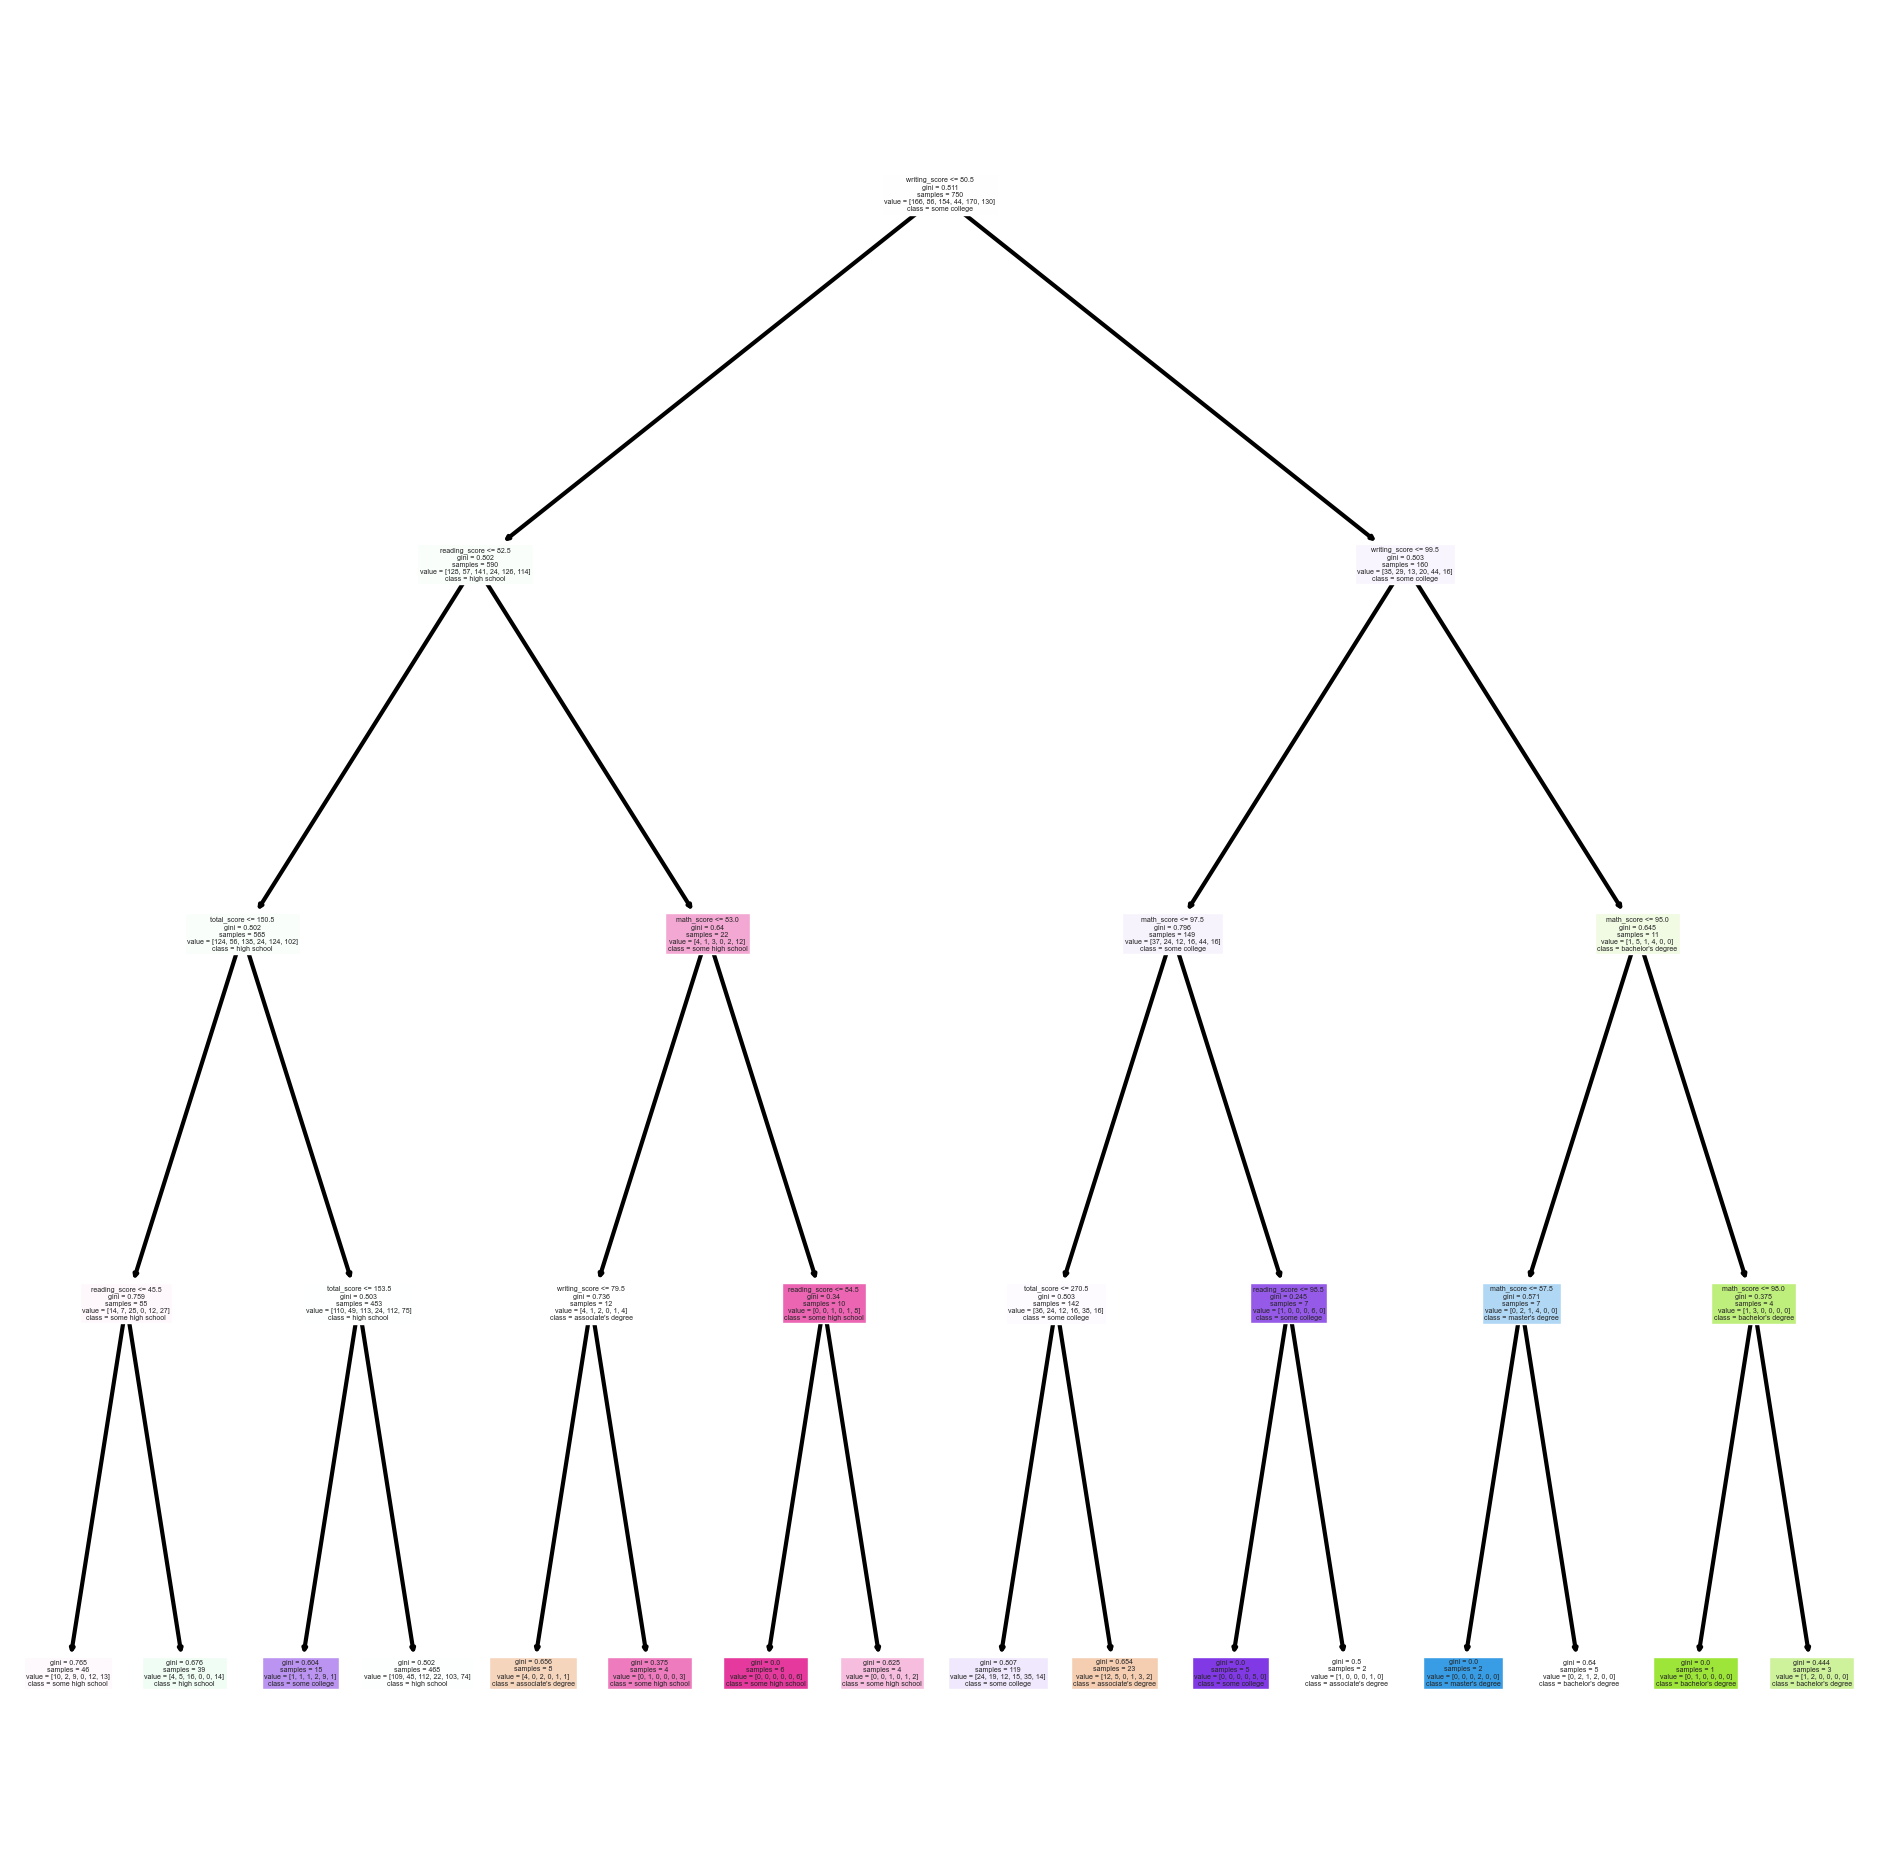

In [10]:
predictors = ["reading_score", "writing_score", "math_score", "total_score"]

y = pd.DataFrame(studydata['parental_level_of_education'].astype('category'))
X = pd.DataFrame(studydata[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Draw the distribution of Response
sb.catplot(y = "parental_level_of_education", data = y_train, kind = "count")

# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f, axes = plt.subplots(7, 1, figsize=(18, 42))

count = 0
for var in X_train:
    sb.boxplot(x = var, y = "parental_level_of_education", data = trainDF, orient = "h", ax = axes[count])
    count += 1
    
    
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(24, 24))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Response Variable : lunchbool Predictor Feature : reading_score, writing_score, math_score, total_score

In [11]:
studydata['lunchbool'] = studydata['lunch'].replace({'standard': True, 'free/reduced': False})

# Verify the changes
print(studydata.head())

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score  mean_score  median_score  lunchbool  
0          218       72.67          72.0       True  
1          247       82.33          88.0    

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7053333333333334

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.712



<Axes: >

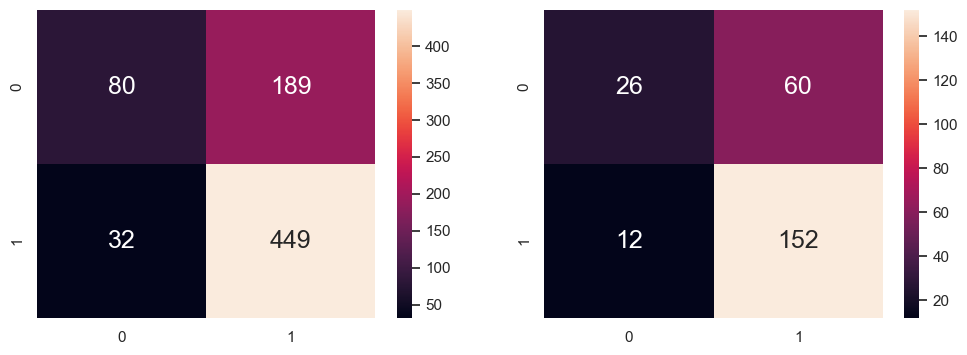

In [12]:
y = pd.DataFrame(studydata['lunchbool'])
X = pd.DataFrame(studydata[["math_score", "reading_score", "writing_score", "total_score"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

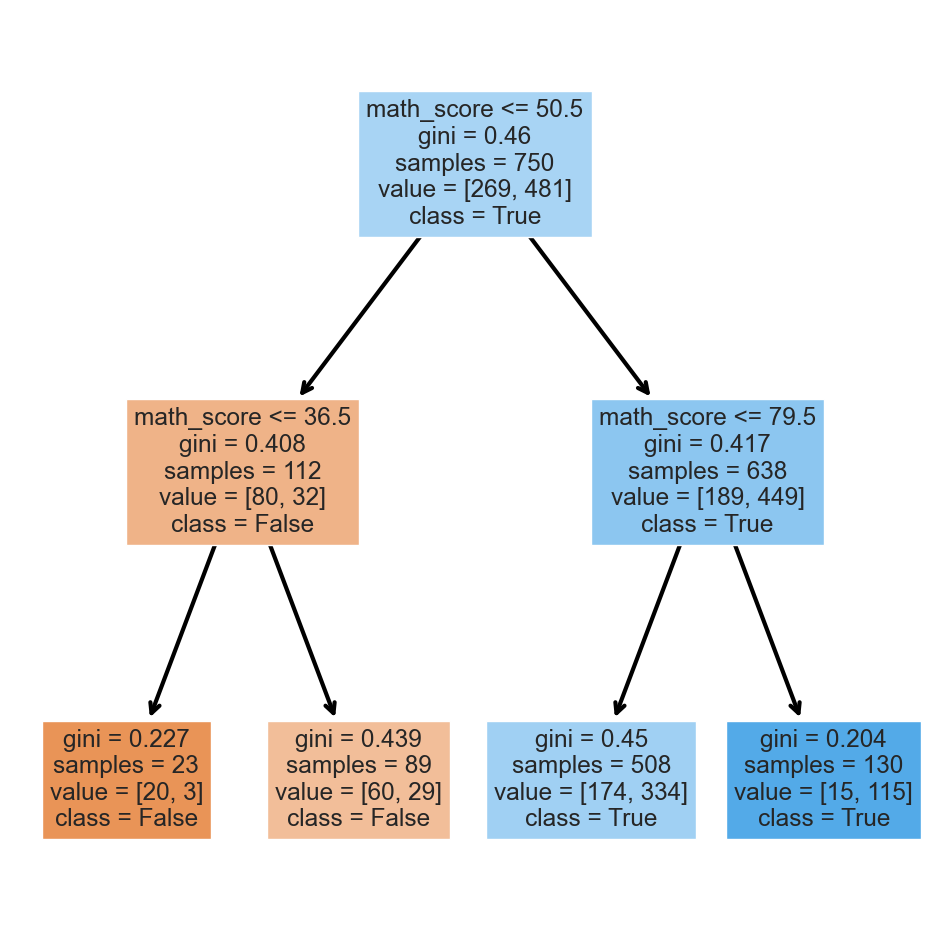

In [13]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7133333333333334

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.712



<Axes: >

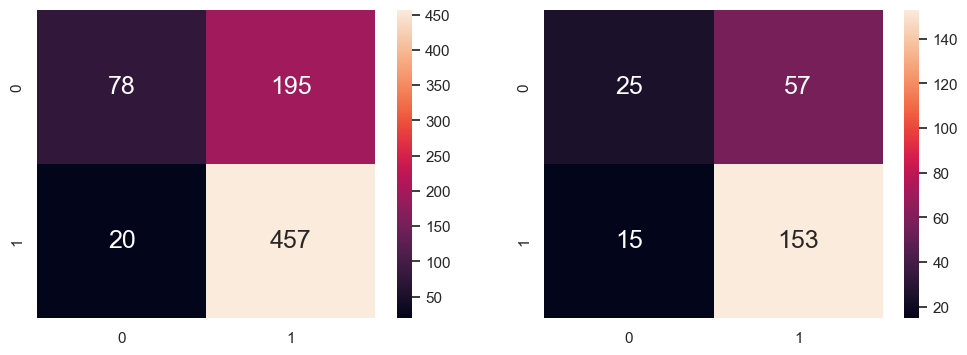

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Response Variable : **testbool**     
Predictor Feature : **reading_score, writing_score, math_score, total_score**     

In [15]:
studydata['testbool'] = studydata['test_preparation_course'].replace({'completed': True, 'none': False})

# Verify the changes
print(studydata.head())

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score  mean_score  median_score  lunchbool  testbool  
0          218       72.67          72.0       True     False  
1          247       82.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.684

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.668



<Axes: >

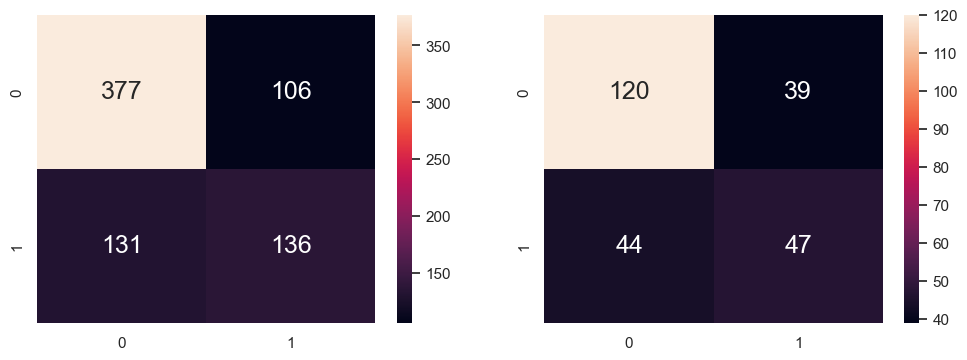

In [16]:
y = pd.DataFrame(studydata['testbool'])
X = pd.DataFrame(studydata[["math_score", "reading_score", "writing_score", "total_score"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

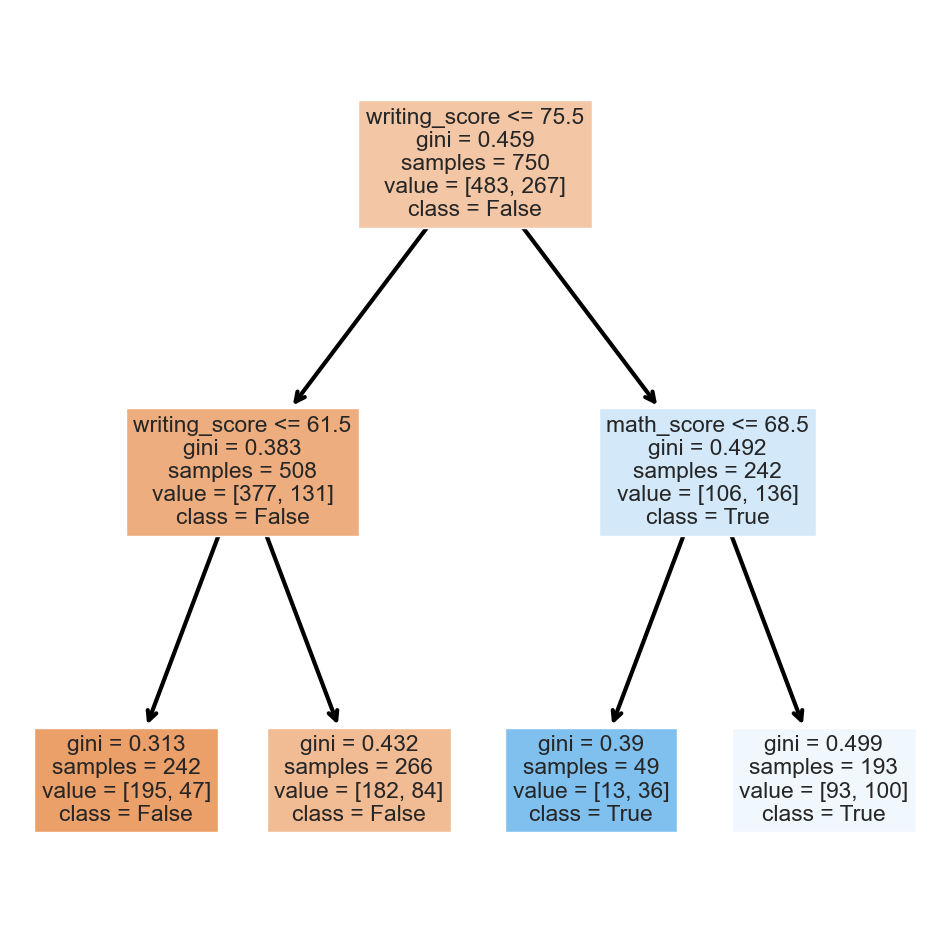

In [17]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

In [18]:
studydata['genderbool'] = studydata['gender'].replace({'female': True, 'male': False})

# Verify the changes
print(studydata.head())

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score  mean_score  median_score  lunchbool  testbool  genderbool  
0          218       72.67          72.0       True     False        True  


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.72

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.704



<Axes: >

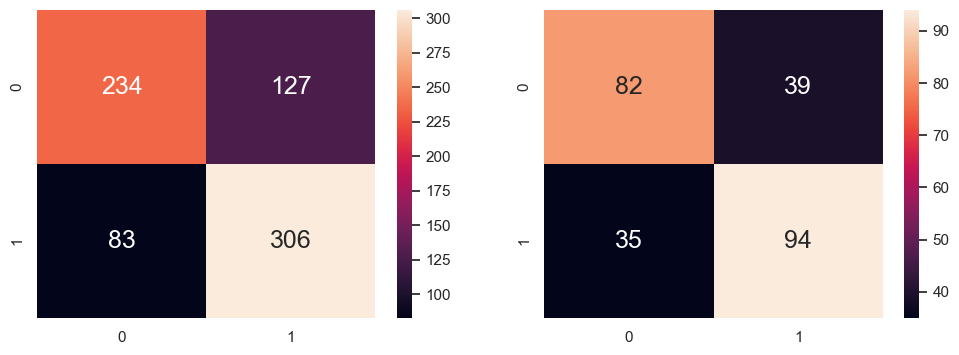

In [19]:
y = pd.DataFrame(studydata['genderbool'])
X = pd.DataFrame(studydata[["math_score", "reading_score", "writing_score", "total_score"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model
# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

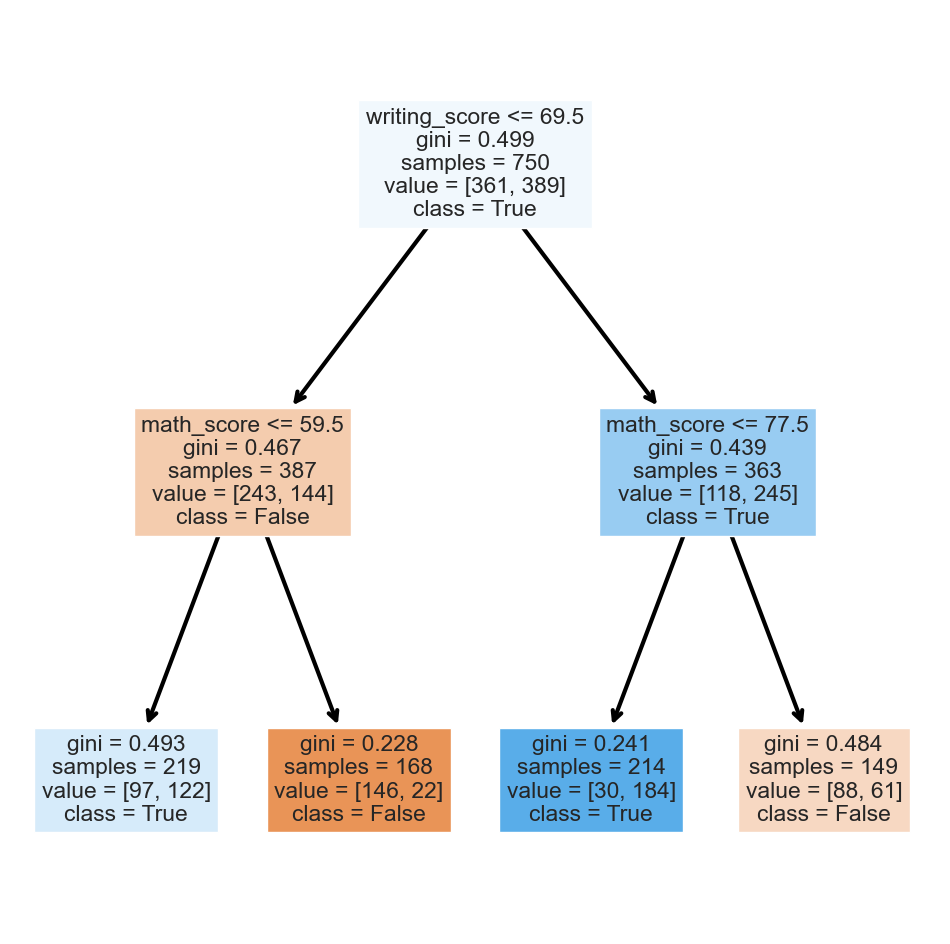

In [20]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

In [21]:
# Step 1: Calculate the 70th, 40th & 25th percentile scores
p70 = np.percentile(studydata['total_score'], 70)
p40 = np.percentile(studydata['total_score'], 40)
p25 = np.percentile(studydata['total_score'], 25)


# Step 2: Create a new column called "division" and initialize it with a default value
studydata['division'] = 'Third Division'

# Step 3: Iterate through the rows and update the "division" column
studydata.loc[studydata['total_score'] >= p70, 'division'] = 'First Division'
studydata.loc[studydata['total_score'].between(p40, p70), 'division'] = 'Second Division'
studydata.loc[studydata['total_score'].between(p25, p40), 'division'] = 'Third Division'
studydata.loc[studydata['total_score'] < p25, 'division'] = 'Fail'



# Print the updated DataFrame
studydata.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,mean_score,median_score,lunchbool,testbool,genderbool,division
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67,72.0,True,False,True,Second Division
1,female,group C,some college,standard,completed,69,90,88,247,82.33,88.0,True,True,True,First Division
2,female,group B,master's degree,standard,none,90,95,93,278,92.67,93.0,True,False,True,First Division
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33,47.0,False,False,False,Fail
4,male,group C,some college,standard,none,76,78,75,229,76.33,76.0,True,False,False,First Division


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.37333333333333335

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.436



<Axes: >

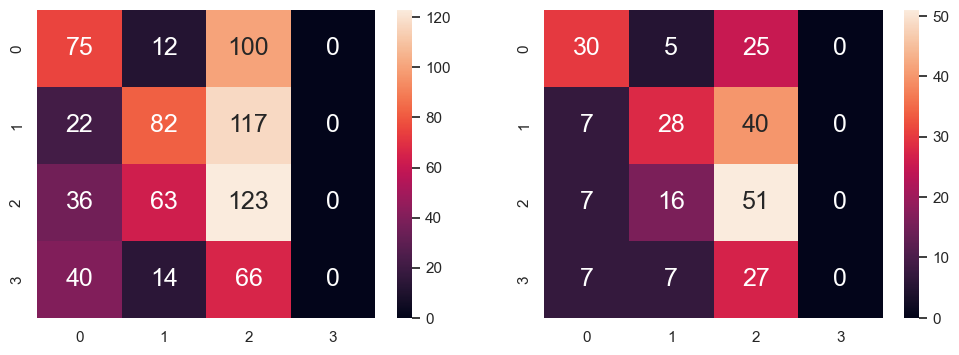

In [22]:
y = pd.DataFrame(studydata['division'])
X = pd.DataFrame(studydata[["genderbool", "testbool", "lunchbool"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model
# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

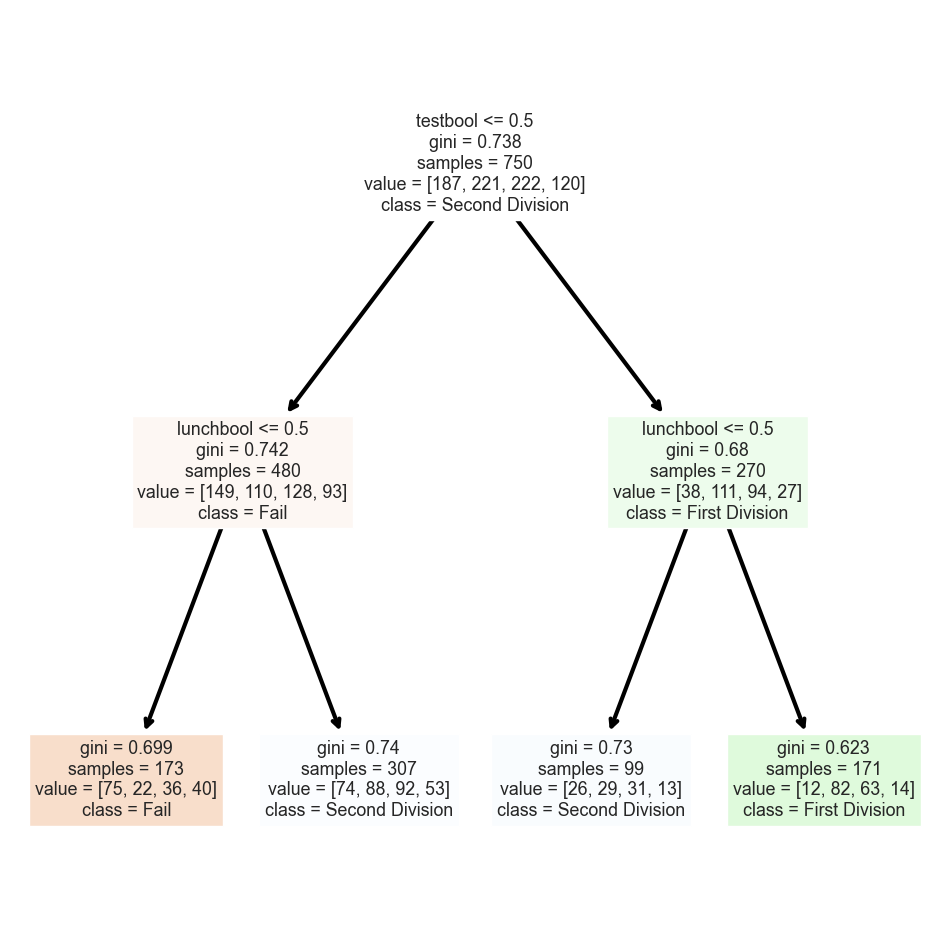

In [23]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.32

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.344



<Axes: >

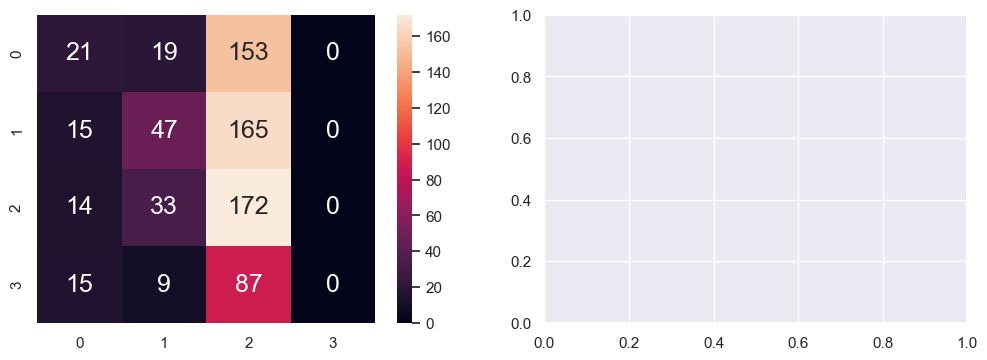

In [24]:
# Convert categorical data into numerical data using one-hot encoding
X = pd.get_dummies(studydata[['race_ethnicity']])
y = studydata['division']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
# Convert categorical data into numerical data using one-hot encoding
X = pd.get_dummies(studydata[['race_ethnicity']]).values
y = studydata['division'].values

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model
# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))

sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])



Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.32

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.344



<Axes: >

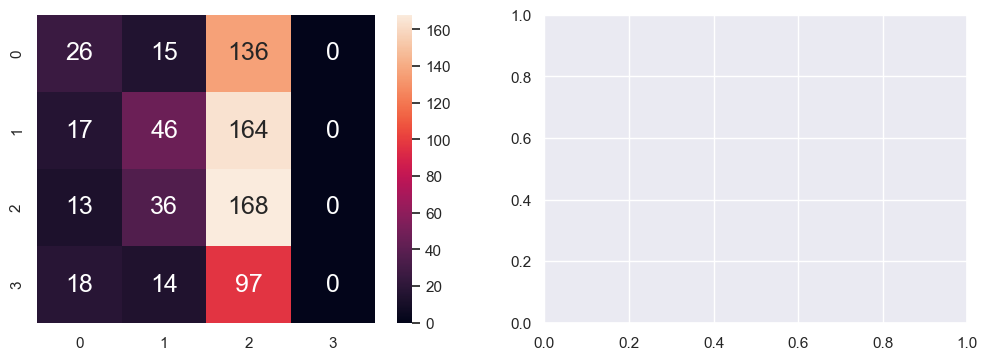

In [25]:
# Convert categorical data into numerical data using one-hot encoding
X = pd.get_dummies(studydata[['parental_level_of_education']])
y = studydata['division']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
# Convert categorical data into numerical data using one-hot encoding
X = pd.get_dummies(studydata[['race_ethnicity']]).values
y = studydata['division'].values

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model
# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))

sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])



Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.348

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.284



<Axes: >

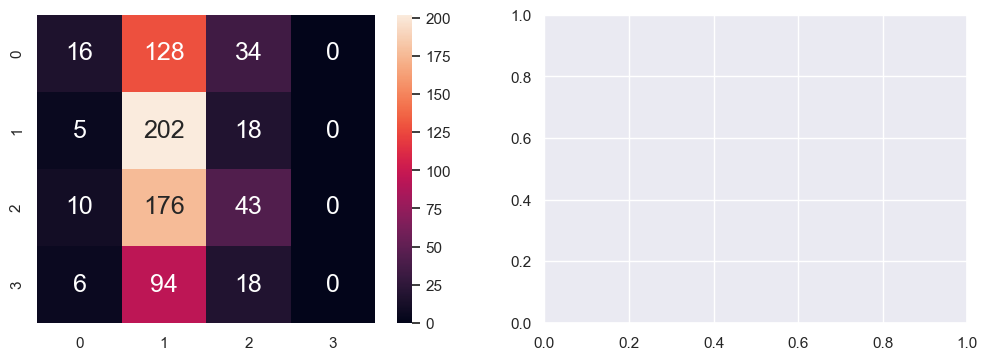

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create a new dataframe with only the desired predictor variables
predictors = studydata[['race_ethnicity', 'parental_level_of_education']]

# Perform one-hot encoding on the predictor variables
ohe = OneHotEncoder()
ct = ColumnTransformer(transformers=[('encoder', ohe, ['race_ethnicity', 'parental_level_of_education'])], remainder='passthrough')
X = ct.fit_transform(predictors)
y = studydata['division']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model
# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))

sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

In [27]:
from sklearn import tree
import matplotlib.pyplot as plt

# Convert array of class names to a list
class_names_list = dectree.classes_.tolist()

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dectree, feature_names=feature_names_list, class_names=class_names_list, filled=True)
plt.show()

NameError: name 'feature_names_list' is not defined

<Figure size 1200x800 with 0 Axes>

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.356

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.308



<Axes: >

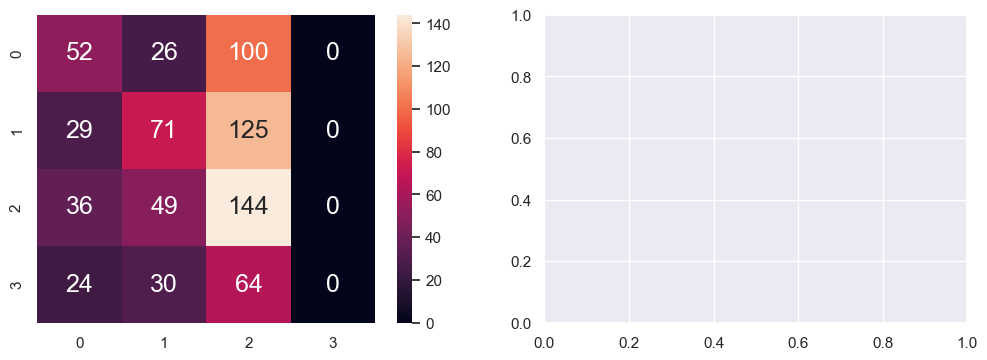

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb

# Create a new dataframe with only the desired predictor variables
predictors = studydata[['race_ethnicity', 'parental_level_of_education']]

# Perform label encoding on the predictor variables
label_encoder = LabelEncoder()
predictors_encoded = predictors.apply(label_encoder.fit_transform)

X = predictors_encoded.values
y = studydata['division']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=2) # create the decision tree object
dectree.fit(X_train, y_train)          # train the decision tree model
# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))

sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])